#  Fake News Detection Using Machine Learning

---

##  Introduction
The rise of fake news has had a significant impact on public opinion and trust in media. With the increasing spread of misinformation on digital platforms, detecting fake news has become a critical challenge. In this project, we aim to use **Natural Language Processing (NLP)** and **Machine Learning** techniques to automatically identify whether a news article is real or fake based on its content.

---

##  Problem Definition
Given a dataset of news articles labeled as **fake (1)** or **real (0)**, build a machine learning model that can:
- Analyze and extract meaningful features from textual data.
- Predict whether a news article is fake or real.
- Provide insights into which features (words) influence the prediction.

---

##  Data Overview
The dataset is taken from the [Kaggle Fake News Competition](https://www.kaggle.com/c/fake-news/data). It contains:

- **title**: Headline of the article  
- **text**: Full content of the article  
- **label**: Target variable (1 = fake, 0 = real)

For this project, we will combine the `title` and `text` fields into a single input feature.

---

##  Features and Techniques
- **Text Preprocessing**: Lowercasing, handling missing values, stopword removal
- **Feature Extraction**: TF-IDF Vectorization of textual data
- **Modeling**: Logistic Regression (baseline), Naive Bayes (optional)
- **Evaluation**: Confusion Matrix, Accuracy, Precision, Recall, F1-Score
- **Visualization**: Seaborn plots, heatmaps, and word clouds (optional)

---

##  Evaluation Metrics
To evaluate the performance of the model, we will use:
- **Accuracy**: Overall correctness of the model  
- **Precision**: Correct positive predictions / total predicted positives  
- **Recall**: Correct positive predictions / all actual positives  
- **F1-Score**: Harmonic mean of Precision and Recall  
- **Confusion Matrix**: Visual representation of prediction vs actual

---

##  Notes
- This project focuses on traditional NLP techniques using **TF-IDF** and **Logistic Regression**. Deep learning methods (e.g. BERT, LSTM) can be explored later.
- You can deploy this model as a simple web app using **Streamlit** or **Flask** for additional impact.
- Ideal for Data Science resumes and GitHub portfolios.

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv('data/fake.csv')
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df['label'] = 1

In [5]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [6]:
len(df)

23481

In [7]:
df['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 23481, dtype: object

In [8]:
df2= pd.read_csv('data/true.csv')
df2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
df2['label']=0


In [10]:
df_combined = pd.concat([df, df2], ignore_index=True)

In [11]:
df_combined.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [12]:
df_combined['label'].isna().sum()

np.int64(0)

In [13]:
len(df_combined)

44898

In [14]:
df_combined.to_csv('data/combined.csv', index = False)

In [15]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [16]:
df_combined['label'].value_counts()

label
1    23481
0    21417
Name: count, dtype: int64

In [33]:
df_combined['content'] = df_combined['title'].fillna('') + ' ' + df_combined['text'].fillna('')
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

In [34]:
df_combined.head()

,title,text,subject,date,label,content,text_length
0,CBS Reporter Describes Racism At Donald Trump...,CBS reporter Sopan Deb has been speaking out a...,News,"March 13, 2016",1,CBS Reporter Describes Racism At Donald Trump...,512
1,Maine voters passed measure legalizing marijua...,BOSTON (Reuters) - Maine voters have made the ...,politicsNews,"December 21, 2016",0,Maine voters passed measure legalizing marijua...,336
2,Trump Sets The Record Straight On Border Wall ...,President Trump visited areas in Florida hurt ...,politics,"Sep 14, 2017",1,Trump Sets The Record Straight On Border Wall ...,293
3,"Contenders, picks for key jobs in Trump's admi...",(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 2, 2016",0,"Contenders, picks for key jobs in Trump's admi...",854
4,"Is Hillary’s Meltdown Real, or a Staged Exit?",21st Century Wire says As shocking and controv...,US_News,"September 14, 2016",1,"Is Hillary’s Meltdown Real, or a Staged Exit? ...",97


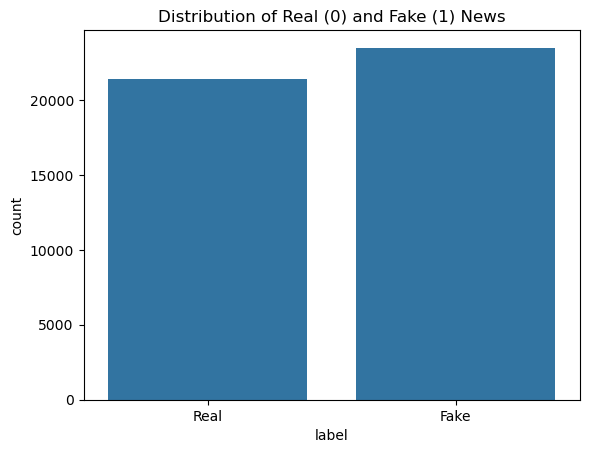

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df_combined)
plt.title('Distribution of Real (0) and Fake (1) News')
plt.xticks([0,1], ['Real', 'Fake'])
plt.show()


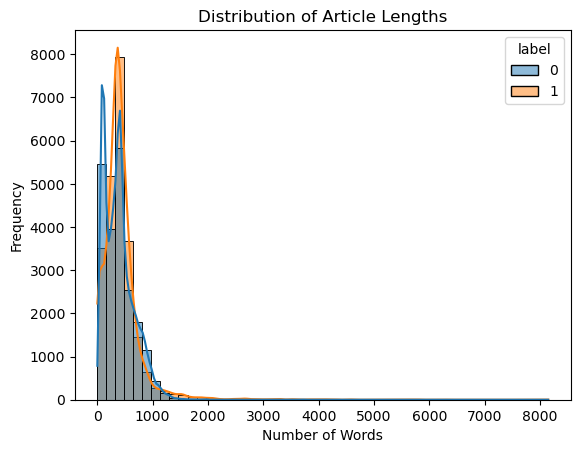

In [19]:
df_combined['text_length'] = df_combined['content'].apply(lambda x: len(str(x).split()))

sns.histplot(data=df_combined, x='text_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


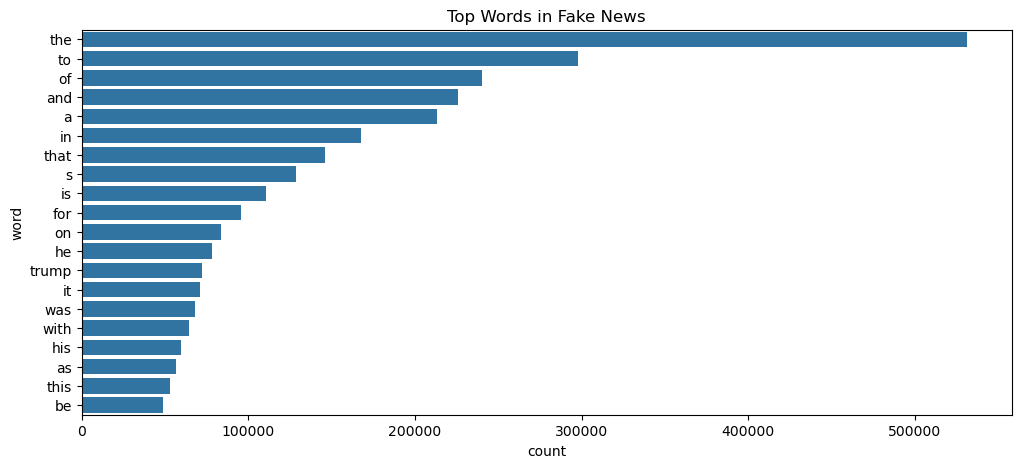

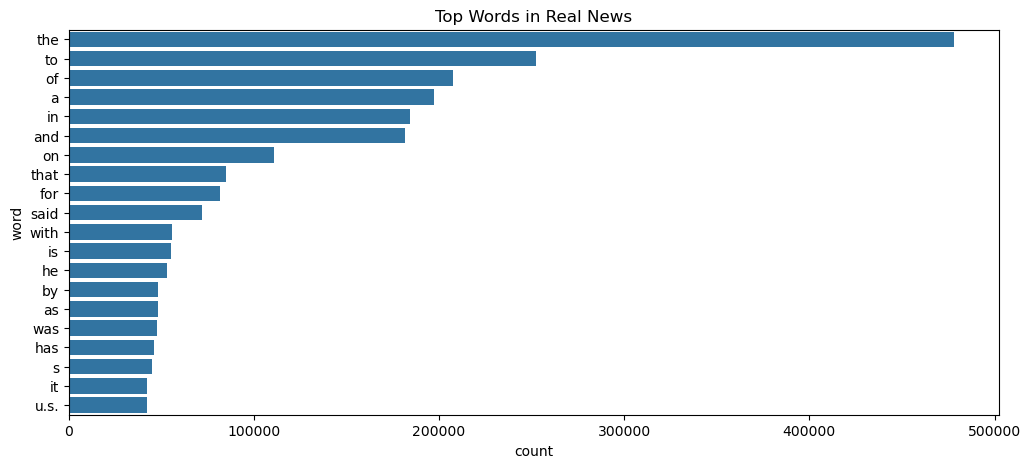

In [20]:
from collections import Counter

fake_words = " ".join(df_combined[df_combined['label'] == 1]['content']).lower().split()
real_words = " ".join(df_combined[df_combined['label'] == 0]['content']).lower().split()

common_fake = Counter(fake_words).most_common(20)
common_real = Counter(real_words).most_common(20)

fake_df = pd.DataFrame(common_fake, columns=['word', 'count'])
real_df = pd.DataFrame(common_real, columns=['word', 'count'])

plt.figure(figsize=(12,5))
sns.barplot(data=fake_df, x='count', y='word')
plt.title("Top Words in Fake News")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=real_df, x='count', y='word')
plt.title("Top Words in Real News")
plt.show()


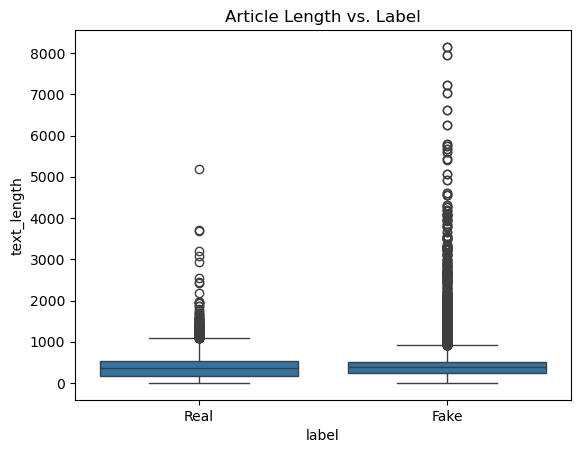

In [21]:
sns.boxplot(x='label', y='text_length', data=df_combined)
plt.title("Article Length vs. Label")
plt.xticks([0,1], ['Real', 'Fake'])
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_combined['content']
y = df_combined['label']

tfidf = TfidfVectorizer(max_df=0.7, min_df=5, max_features=5000, stop_words='english')
X_vec = tfidf.fit_transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



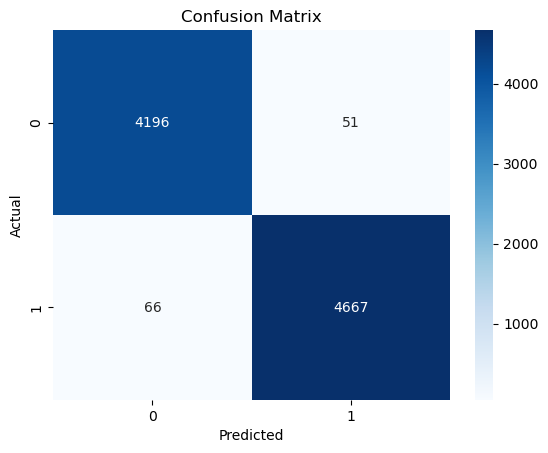

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:


custom_text = ["Donald trump has publically announced his support lgbtq community and has decided to provide 100 million $ per head"]


custom_tfidf = tfidf.transform(custom_text)


prediction = model.predict(custom_tfidf)


print("Prediction:", "REAL" if prediction[0] == 1 else "FAKE")


Prediction: REAL


In [32]:


custom_text = ["india is not independent as of 2025"]

custom_tfidf = tfidf.transform(custom_text)

prediction = model.predict(custom_tfidf)

print("Prediction:", "REAL" if prediction[0] == 1 else "FAKE")


Prediction: REAL
